# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/Applications/anaconda3/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
url1 = f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv"
df1 = pd.read_csv(url1) #load the dataset

url2 = f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv"
df2 = pd.read_csv(url2) # load the dataset

df = pd.concat([df1, df2]) #combine the datasets
df.head()

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [3]:
# Load the datasets
fips_df = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv")
station_df = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv")

# Merge the datasets by reading ID first two letters
station_df['FIPS'] = station_df['ID'].str[:2]
df = pd.merge(df, station_df, on='ID', how='left')

# Then merge with the station_metadata
df = pd.merge(df, fips_df, left_on='FIPS', right_on='FIPS 10-4', how='left')
df = df[['ID', 'Year', 'VALUE1', 'VALUE2', 'VALUE3', 'VALUE4', 'VALUE5', 'VALUE6', 'VALUE7', 'VALUE8', 'VALUE9', 'VALUE10', 'VALUE11', 'VALUE12', 'Name', 'LATITUDE', 'LONGITUDE', 'NAME']]
df = df.rename(columns = {"Name"  : "Country"})
df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,Country,LATITUDE,LONGITUDE,NAME
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181330,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0,Zimbabwe,-20.2000,32.616,CHIPINGE
181331,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0,Zimbabwe,-20.2000,32.616,CHIPINGE
181332,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN,Zimbabwe,-20.2000,32.616,CHIPINGE
181333,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0,Zimbabwe,-20.2000,32.616,CHIPINGE


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [4]:
def query_climate(df, country, year_begin, year_end, month):
    
    """
    Outputs Pandas dataframe of temperature readings for specified countries, dates, month
    
    Args:
    df: the dataframe you want to adjust
    country: which country you want the data on
    year_begin: which year you want to start at
    year_end: which year you want to end at
    month: which month you want to look at in the year
    
    Output:
    It will output the adjusted the dataframe of temperature readings based on country, date, and month
    
    """
    # Filter the data of the column based on country and year
    filtered_df = df[(df['Country'] == country) & (df['Year'] >= year_begin) & (df['Year'] <= year_end)].copy()
    
    # Construct the column name for the specified month
    month_column = f'VALUE{month}'
    
    # Select relevant columns and adjust the temperature to the correct scale
    result_df = filtered_df[['NAME', 'LATITUDE', 'LONGITUDE', 'Country', 'Year', month_column]].copy()
    result_df['Temp'] = result_df[month_column] / 100.0
    result_df['Month'] = month
    
    # Reorder columns and create the final dataframe to return
    final_df = result_df[['NAME', 'LATITUDE', 'LONGITUDE', 'Country', 'Year', 'Month', 'Temp']].copy()
    
    return final_df


Run this example and check if you get the correct result, your obtained dataframe looks like:

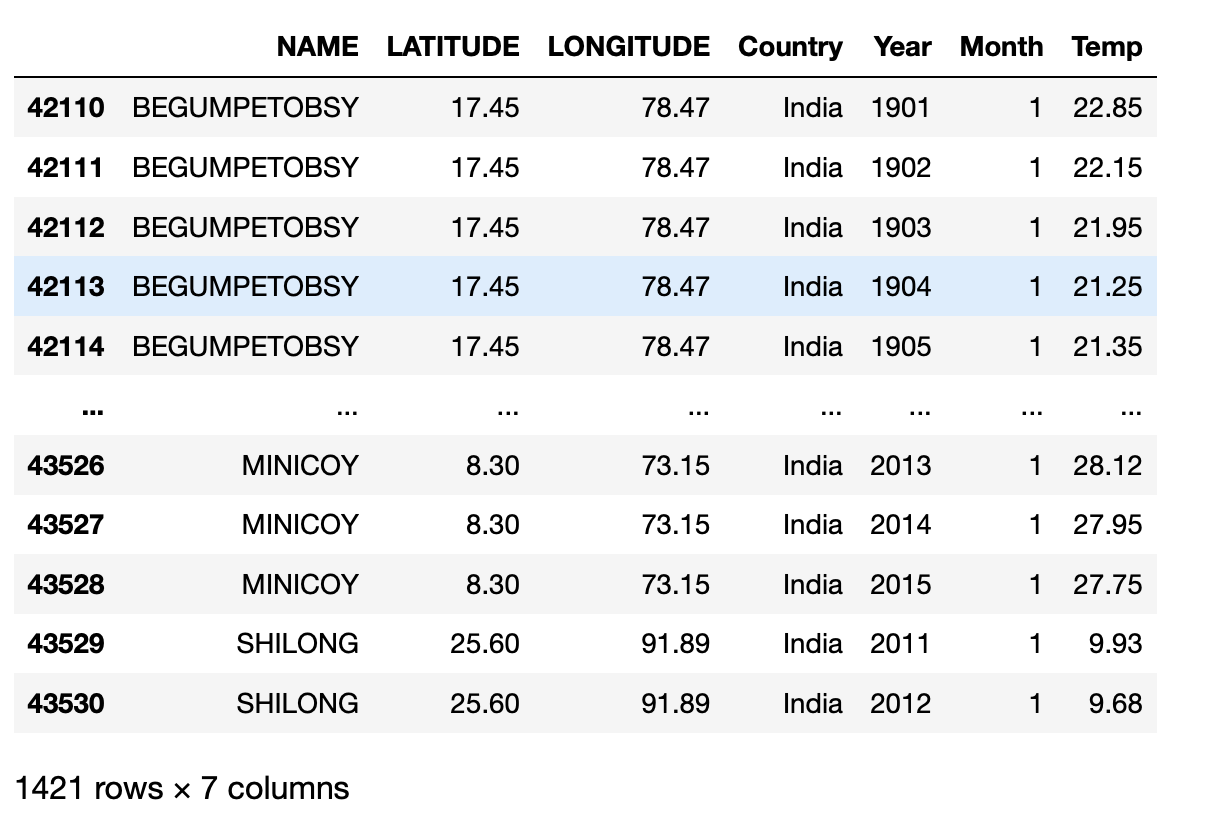

In [5]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
7643,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
7644,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
7645,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
7646,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
7647,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
78046,ALLAHABAD_BAMHRAULI,25.50,81.90,India,2011,1,NaN
78047,ALLAHABAD_BAMHRAULI,25.50,81.90,India,2012,1,NaN
78048,ALLAHABAD_BAMHRAULI,25.50,81.90,India,2013,1,15.30
78049,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

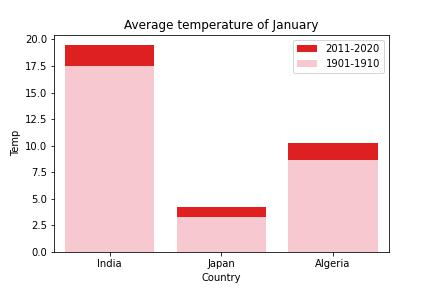

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

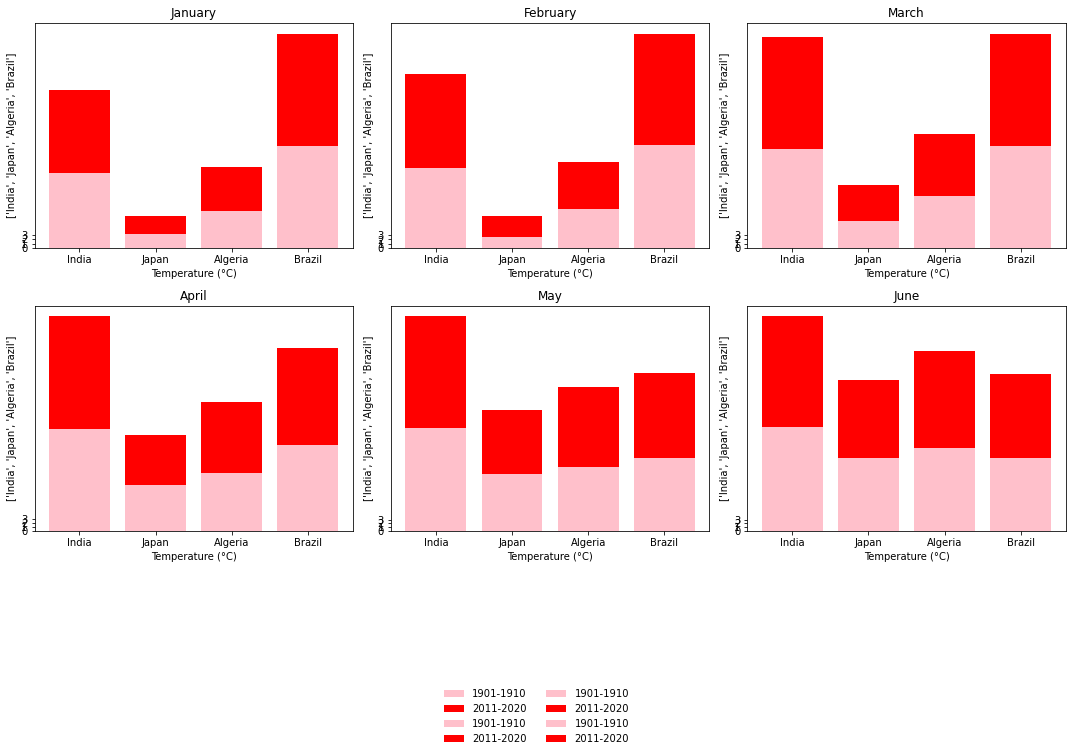

In [6]:
def plot_graph(df, countries, months):
    """
    Outputs plots vertically arranged stacked average temperatures of specified countries for specified months/
    
    Parameters:
    df: The dataframe containing temperature data.
    countries: A list of country names.
    months: A list of integers representing months (1 for January, 2 for February, etc.).
    
    Outputs:
    Stacked graphs to see average temperatures of each month between different countries.
    """
    # Month names for the titles
    month_names = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
    
    # Set up the matplotlib figure and axes
    ncols = 3  # We will arrange the plots in a 2x3 layout
    nrows = int(np.ceil(len(months) / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))  # Adjust the size as needed
    
    # Flatten the axis array for easy iteration
    axs = axs.flatten()

    for i, month in enumerate(months):
        ax = axs[i]
        for j, country in enumerate(countries):
            # Filter the DataFrame for the country and the two decades
            df_country = df[df['Country'] == country]
            avg_temp_1901_1910 = df_country[(df_country['Year'] >= 1901) & (df_country['Year'] <= 1910)][f'VALUE{month}'].mean() / 100.0
            avg_temp_2011_2020 = df_country[(df_country['Year'] >= 2011) & (df_country['Year'] <= 2020)][f'VALUE{month}'].mean() / 100.0
            
            # Stacked bar for 1901-1910
            axs[i].bar(country, avg_temp_1901_1910, label='1901-1910' if i == 0 else "", color='pink')
            # Stacked bar for 2011-2020
            axs[i].bar(country, avg_temp_2011_2020, bottom=avg_temp_1901_1910, label='2011-2020' if i == 0 else "", color='red')
        
        # Set title and labels
        ax.set_title(f'{month_names[month]}')
        ax.set_xlabel('Temperature (°C)')
        ax.set_yticks(range(len(countries)))
        ax.set_ylabel(countries)

    # Add a legend to the last subplot used
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.1, 1, 0.9])

    # Show the plot
    plt.show()

plot_graph(df, ['India', 'Japan', 'Algeria', 'Brazil'], [1, 2, 3, 4, 5, 6])

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

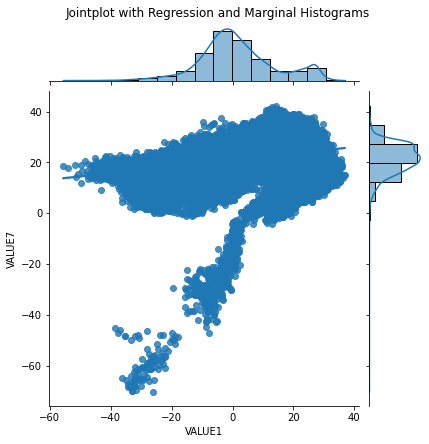

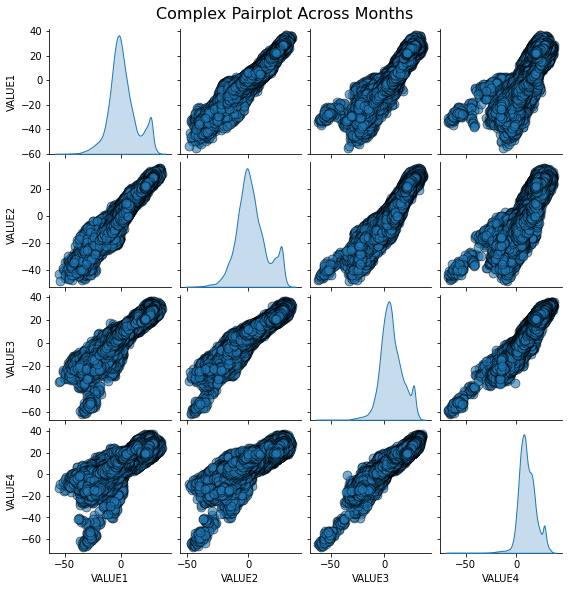

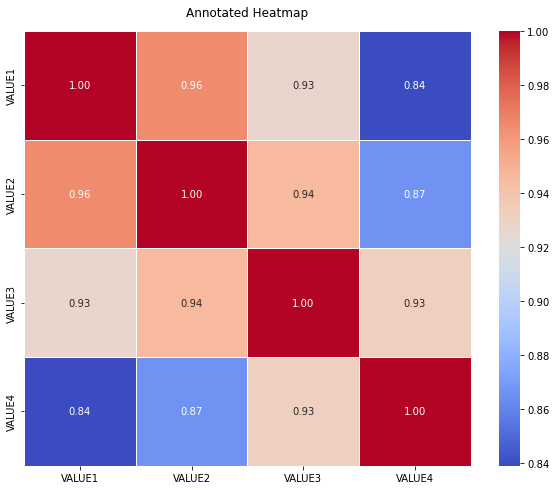

In [7]:
def jointplot_regression(df, x_col, y_col):
    """
    Creates a jointplot that showcases the relationship between two columns with both
    a scatter plot and a regression line, along with marginal histograms on the sides.

    Parameters:
    df (DataFrame): The dataframe containing the data for plotting.
    x_col (str): Column name for the x-axis variable.
    y_col (str): Column name for the y-axis variable.

    Returns:
    A jointplot with regression and histograms.
    """
    # Make a copy of the DataFrame to avoid changing the original data
    df_copy = df.copy()

    # Assuming the temperature values are in hundredths of degrees, divide by 100
    df_copy[x_col] = df_copy[x_col] / 100.0
    df_copy[y_col] = df_copy[y_col] / 100.0

    # Create a jointplot with a regression line and marginal histograms
    sns.jointplot(data=df_copy, x=x_col, y=y_col, kind="reg", marginal_kws=dict(bins=15, fill=True))
    plt.suptitle('Jointplot with Regression and Marginal Histograms', y=1.02)
    plt.show()

def pairplot_complex(df, variables):
    """
    Generates a complex pairplot for selected variables, displaying the pairwise relationships
    with kernel density estimates on the diagonals.

    Parameters:
    df (DataFrame): The dataframe containing the data for plotting.
    variables (list of str): List of column names to include in the pairplot.

    Returns:
    A pairplot with kernel density estimates and pairwise relationships.
    """
    # Make a copy of the DataFrame to avoid changing the original data
    df_copy = df.copy()

    # Assuming the temperature values are in hundredths of degrees, divide by 100
    for var in variables:
        df_copy[var] = df_copy[var].astype(float) / 100.0

    # Create a complex pairplot across selected variables
    sns.pairplot(df_copy[variables], diag_kind="kde", plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}, height=2)
    plt.suptitle('Complex Pairplot Across Months', size=16, y=1.02)
    plt.show()

def heatmap_annotated(df, cols):
    """
    Creates an annotated heatmap showing the correlation between selected columns.
    Assumes that the values are in hundredths of degrees and adjusts them for visualization.

    Parameters:
    df (DataFrame): The dataframe containing the data for plotting.
    cols (list of str): List of column names to include in the heatmap.

    Returns:
    An annotated heatmap displaying the correlation matrix.
    """
    # Make a copy of the DataFrame to avoid changing the original data
    df_copy = df.copy()

    # Assuming the temperature values are in hundredths of degrees, divide by 100
    for col in cols:
        df_copy[col] = df_copy[col].astype(float) / 100.0

    # Calculate the correlation matrix
    corr_matrix = df_copy[cols].corr()

    # Create an annotated heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
    plt.title('Annotated Heatmap', y=1.02)
    plt.show()

    
jointplot_regression(df, 'VALUE1', 'VALUE7')

# Choose the columns you want to pair and visualize
columns_to_visualize = ['VALUE1', 'VALUE2', 'VALUE3', 'VALUE4']  # Replace with actual temperature columns
pairplot_complex(df, columns_to_visualize)

heatmap_annotated(df, columns_to_visualize)

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell